# Вторая часть проекта. Разработка модели

## 1. Исследование важности характеристик как параметров модели

In [7]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from dataclasses import dataclass
from tqdm import tqdm
from itertools import product
import sys
import os

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from visualisations import *
from metrics import *
from classifier import *

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '../common_tools')))
from graphs import KNN_Graph, Distance_Graph
from characterisctics_applied import *

In [8]:
def get_good_model(X, y):
    n_estimators_variants = [5, 10, 50, 100]
    max_depth_variants = [None, 5, 10, 20, 40, 80, 160]
    min_samples_leaf_variants = [1, 2, 5, 10, 20]

    param_grid = {
        'n_estimators' : n_estimators_variants,
        'max_depth': max_depth_variants,
        'min_samples_leaf': min_samples_leaf_variants
    }
    model_random_forest = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=model_random_forest, param_grid=param_grid,
                            scoring='f1', cv=5, n_jobs=-1)

    grid_search.fit(X, y.to_numpy().flatten().ravel())

    assert grid_search.best_score_ > 0.85

    return grid_search.best_estimator_

def get_points_dataset(first_points, second_points, join_column_name='distribution_type'):
    first_points[join_column_name] = 0
    second_points[join_column_name] = 1
    all_points = pd.concat([first_points, second_points], ignore_index=True)
    all_points.iloc[[0, -1]]
    X, y = all_points.drop(join_column_name, axis=1), all_points[[join_column_name]]

    return X, y

In [9]:
def describe_features_importances(n: int, observations_count: int =100):
    clfr = DistibutionClassifier(n=n, observations_count=observations_count)
    clfr.generate_chars_points()

    exp_points = clfr.unique_exp_points
    pareto_points = clfr.unique_pareto_points
    draw_two_sets_scatter_plots_matrix(clfr.unique_exp_points, clfr.unique_pareto_points, f"Матрица скатерплотов (n = {n})")

    print('ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————')

    X, y = get_points_dataset(exp_points.copy(), pareto_points.copy())
    model = get_good_model(X, y)

    draw_sorted_barplot(model.feature_importances_, X.columns, f"Важности характеристик (n={n})")

Generating characteristics...


100%|██████████| 100/100 [00:00<00:00, 286.40it/s]



Characteristics generated!


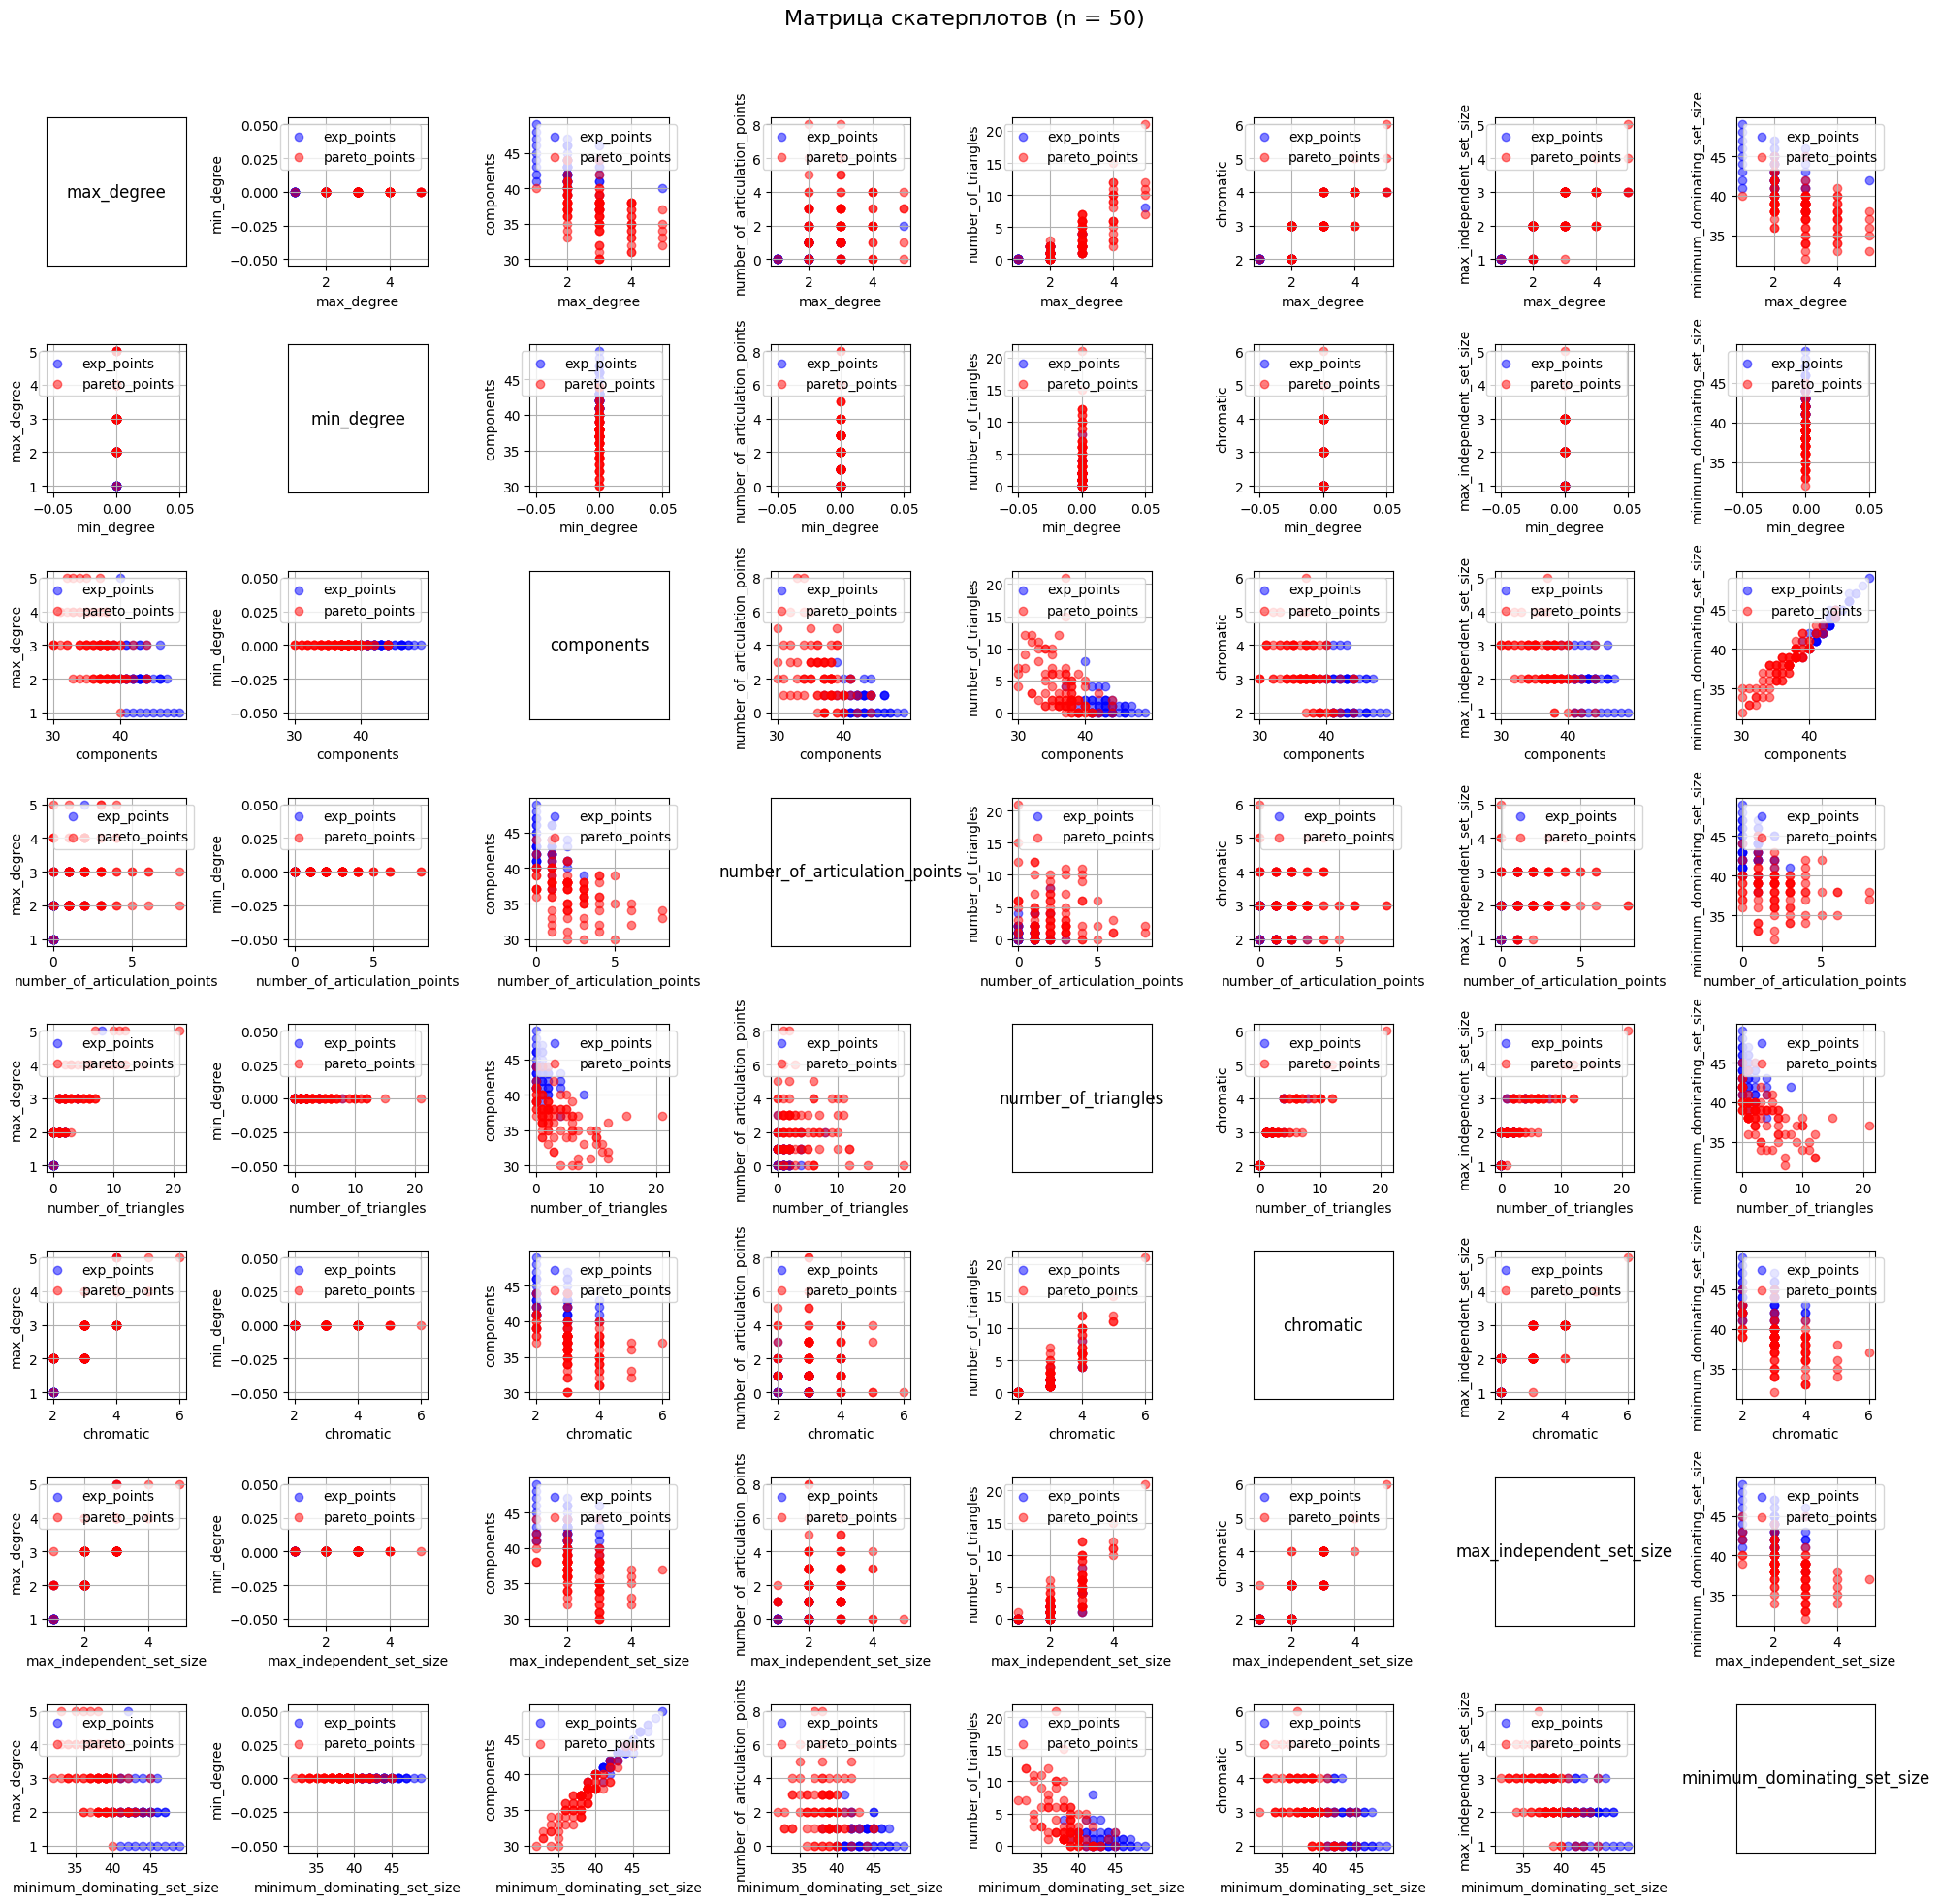

ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————


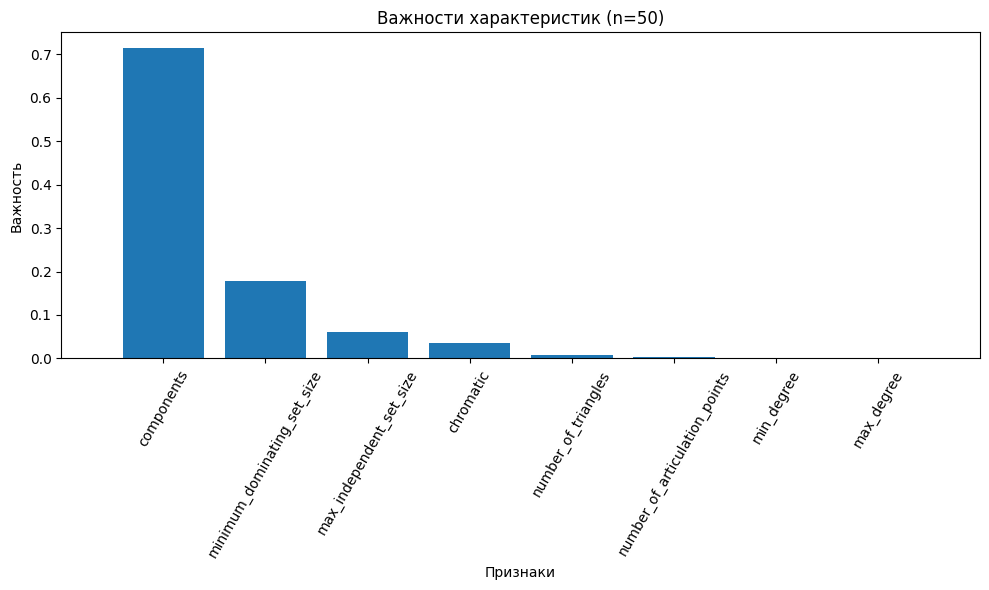

In [10]:
describe_features_importances(50)

Generating characteristics...


100%|██████████| 100/100 [00:00<00:00, 126.89it/s]



Characteristics generated!


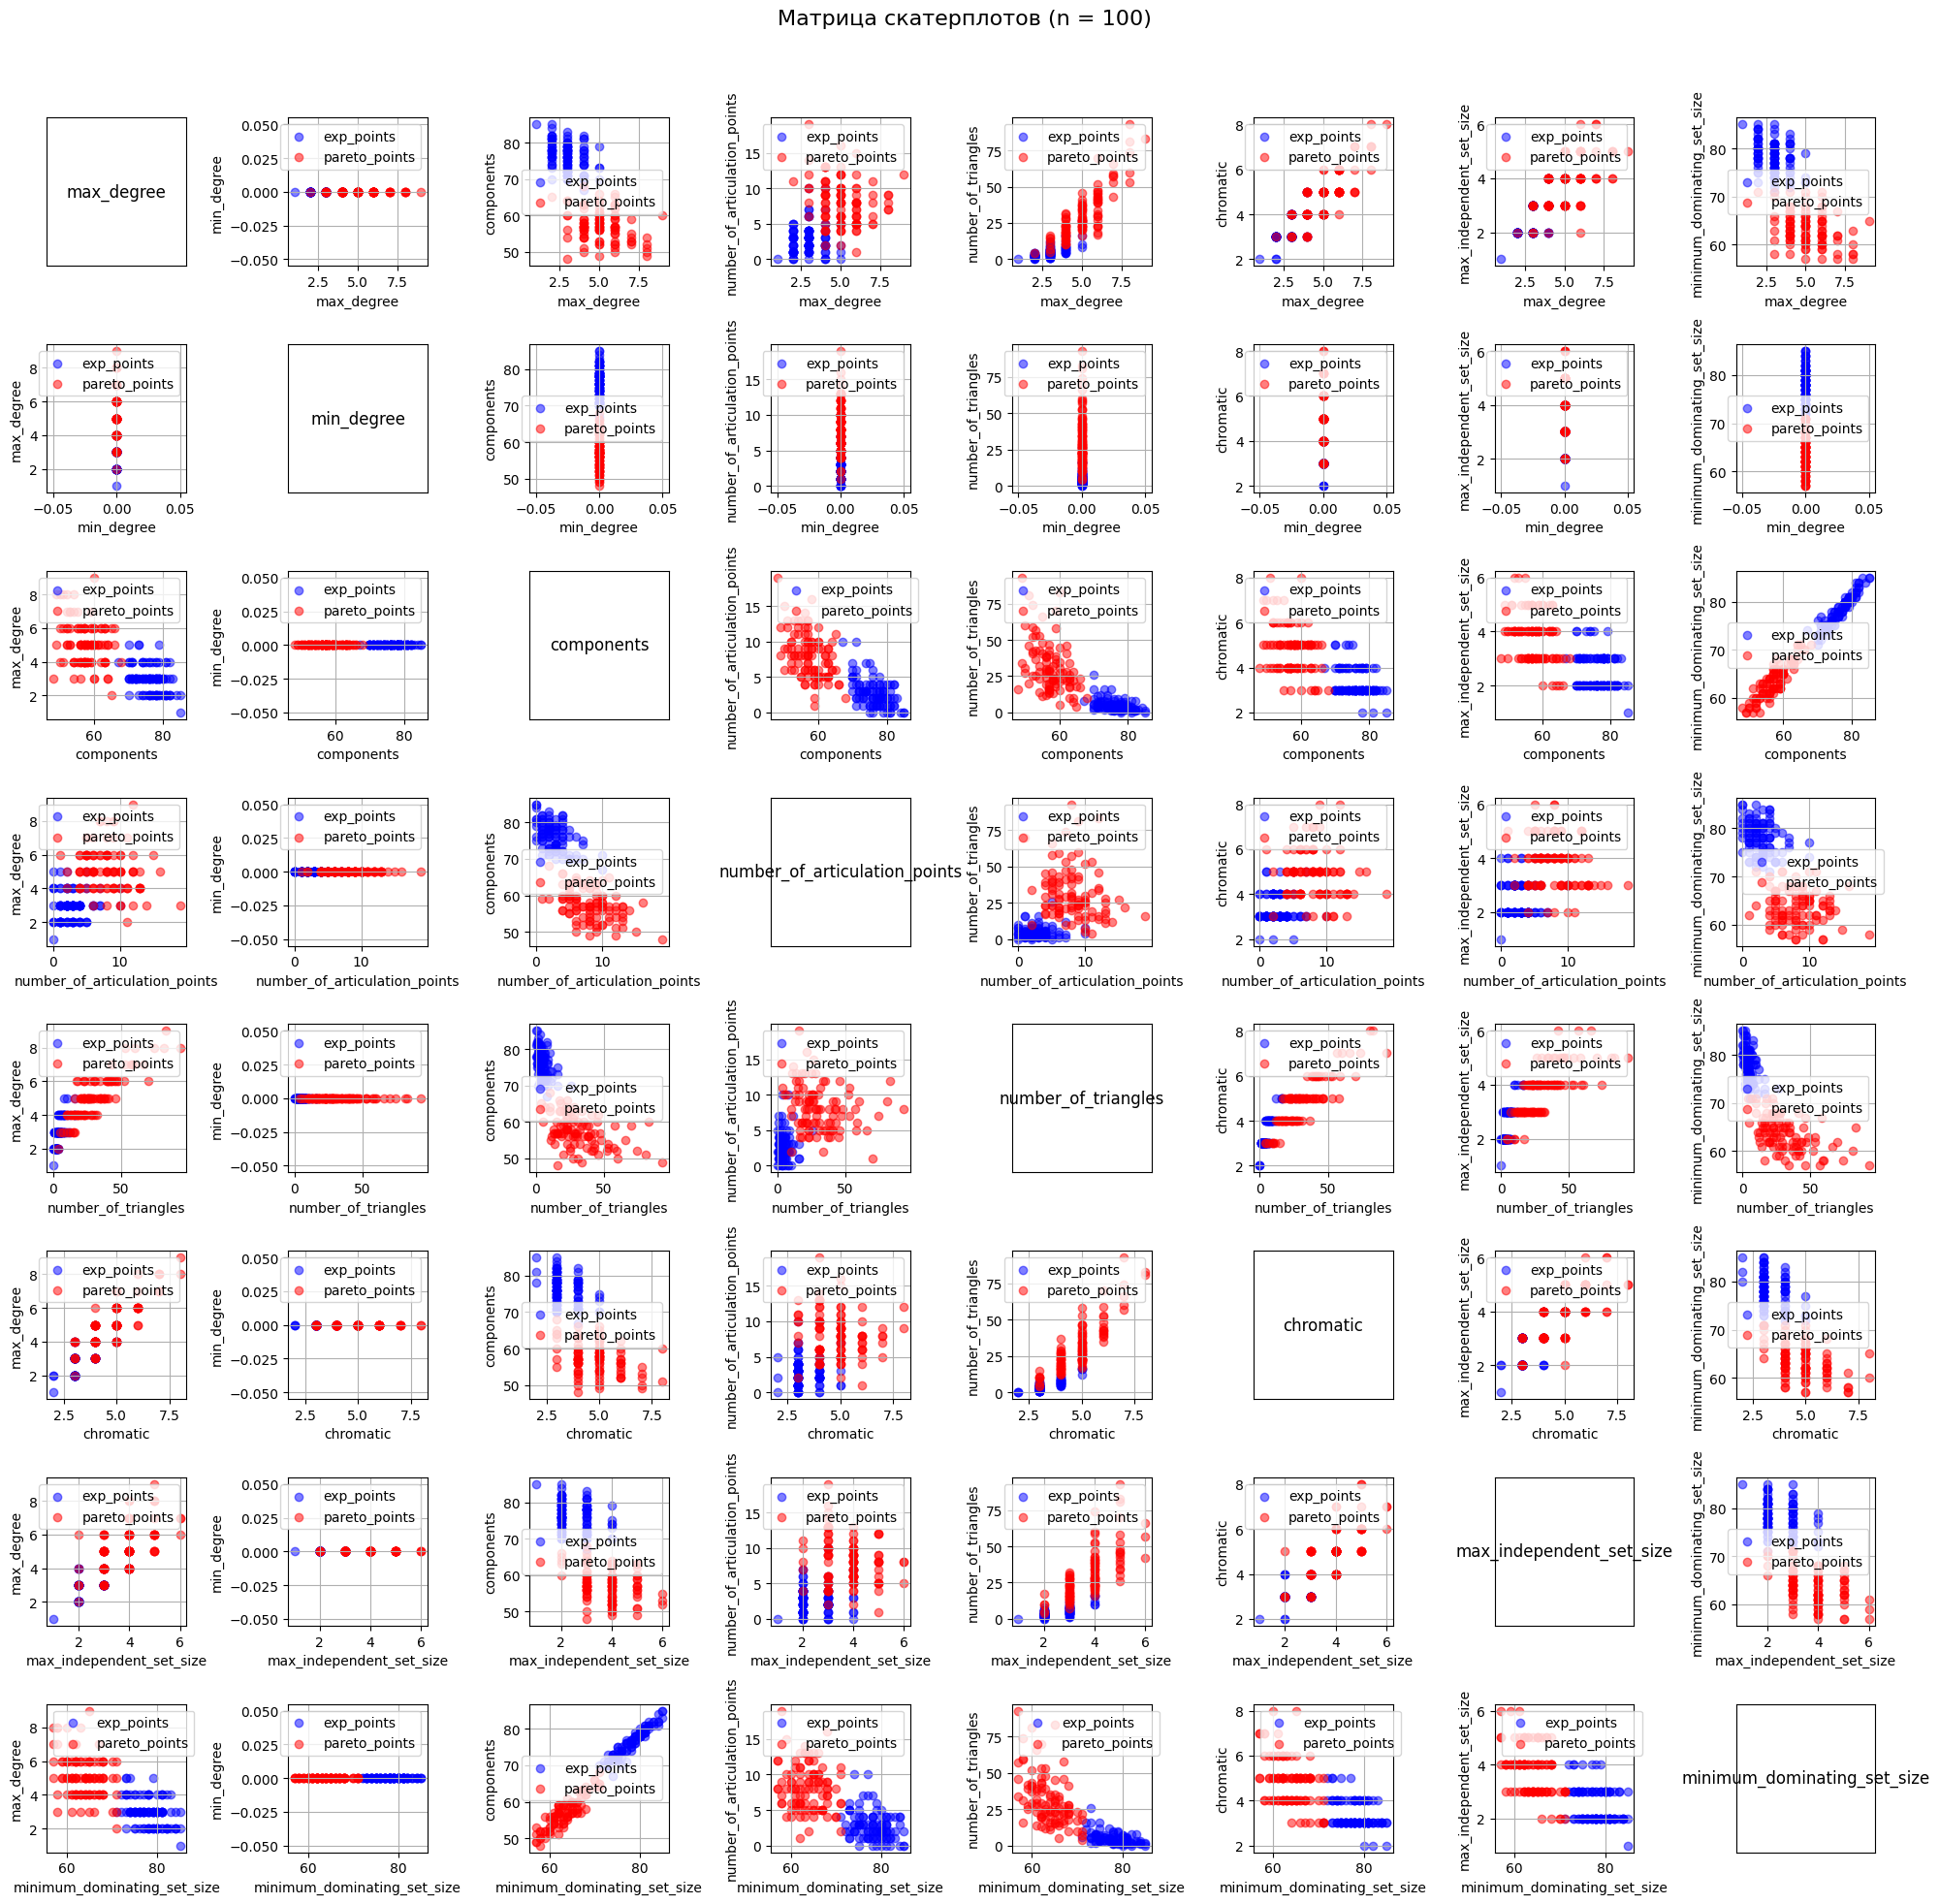

ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————


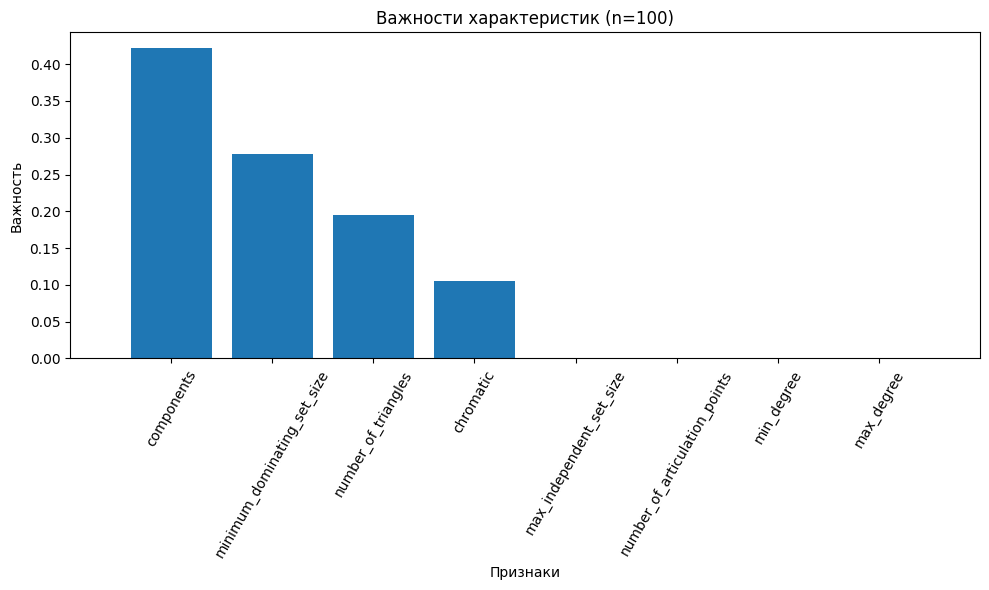

In [11]:
describe_features_importances(100)

Generating characteristics...


100%|██████████| 100/100 [00:13<00:00,  7.54it/s]



Characteristics generated!


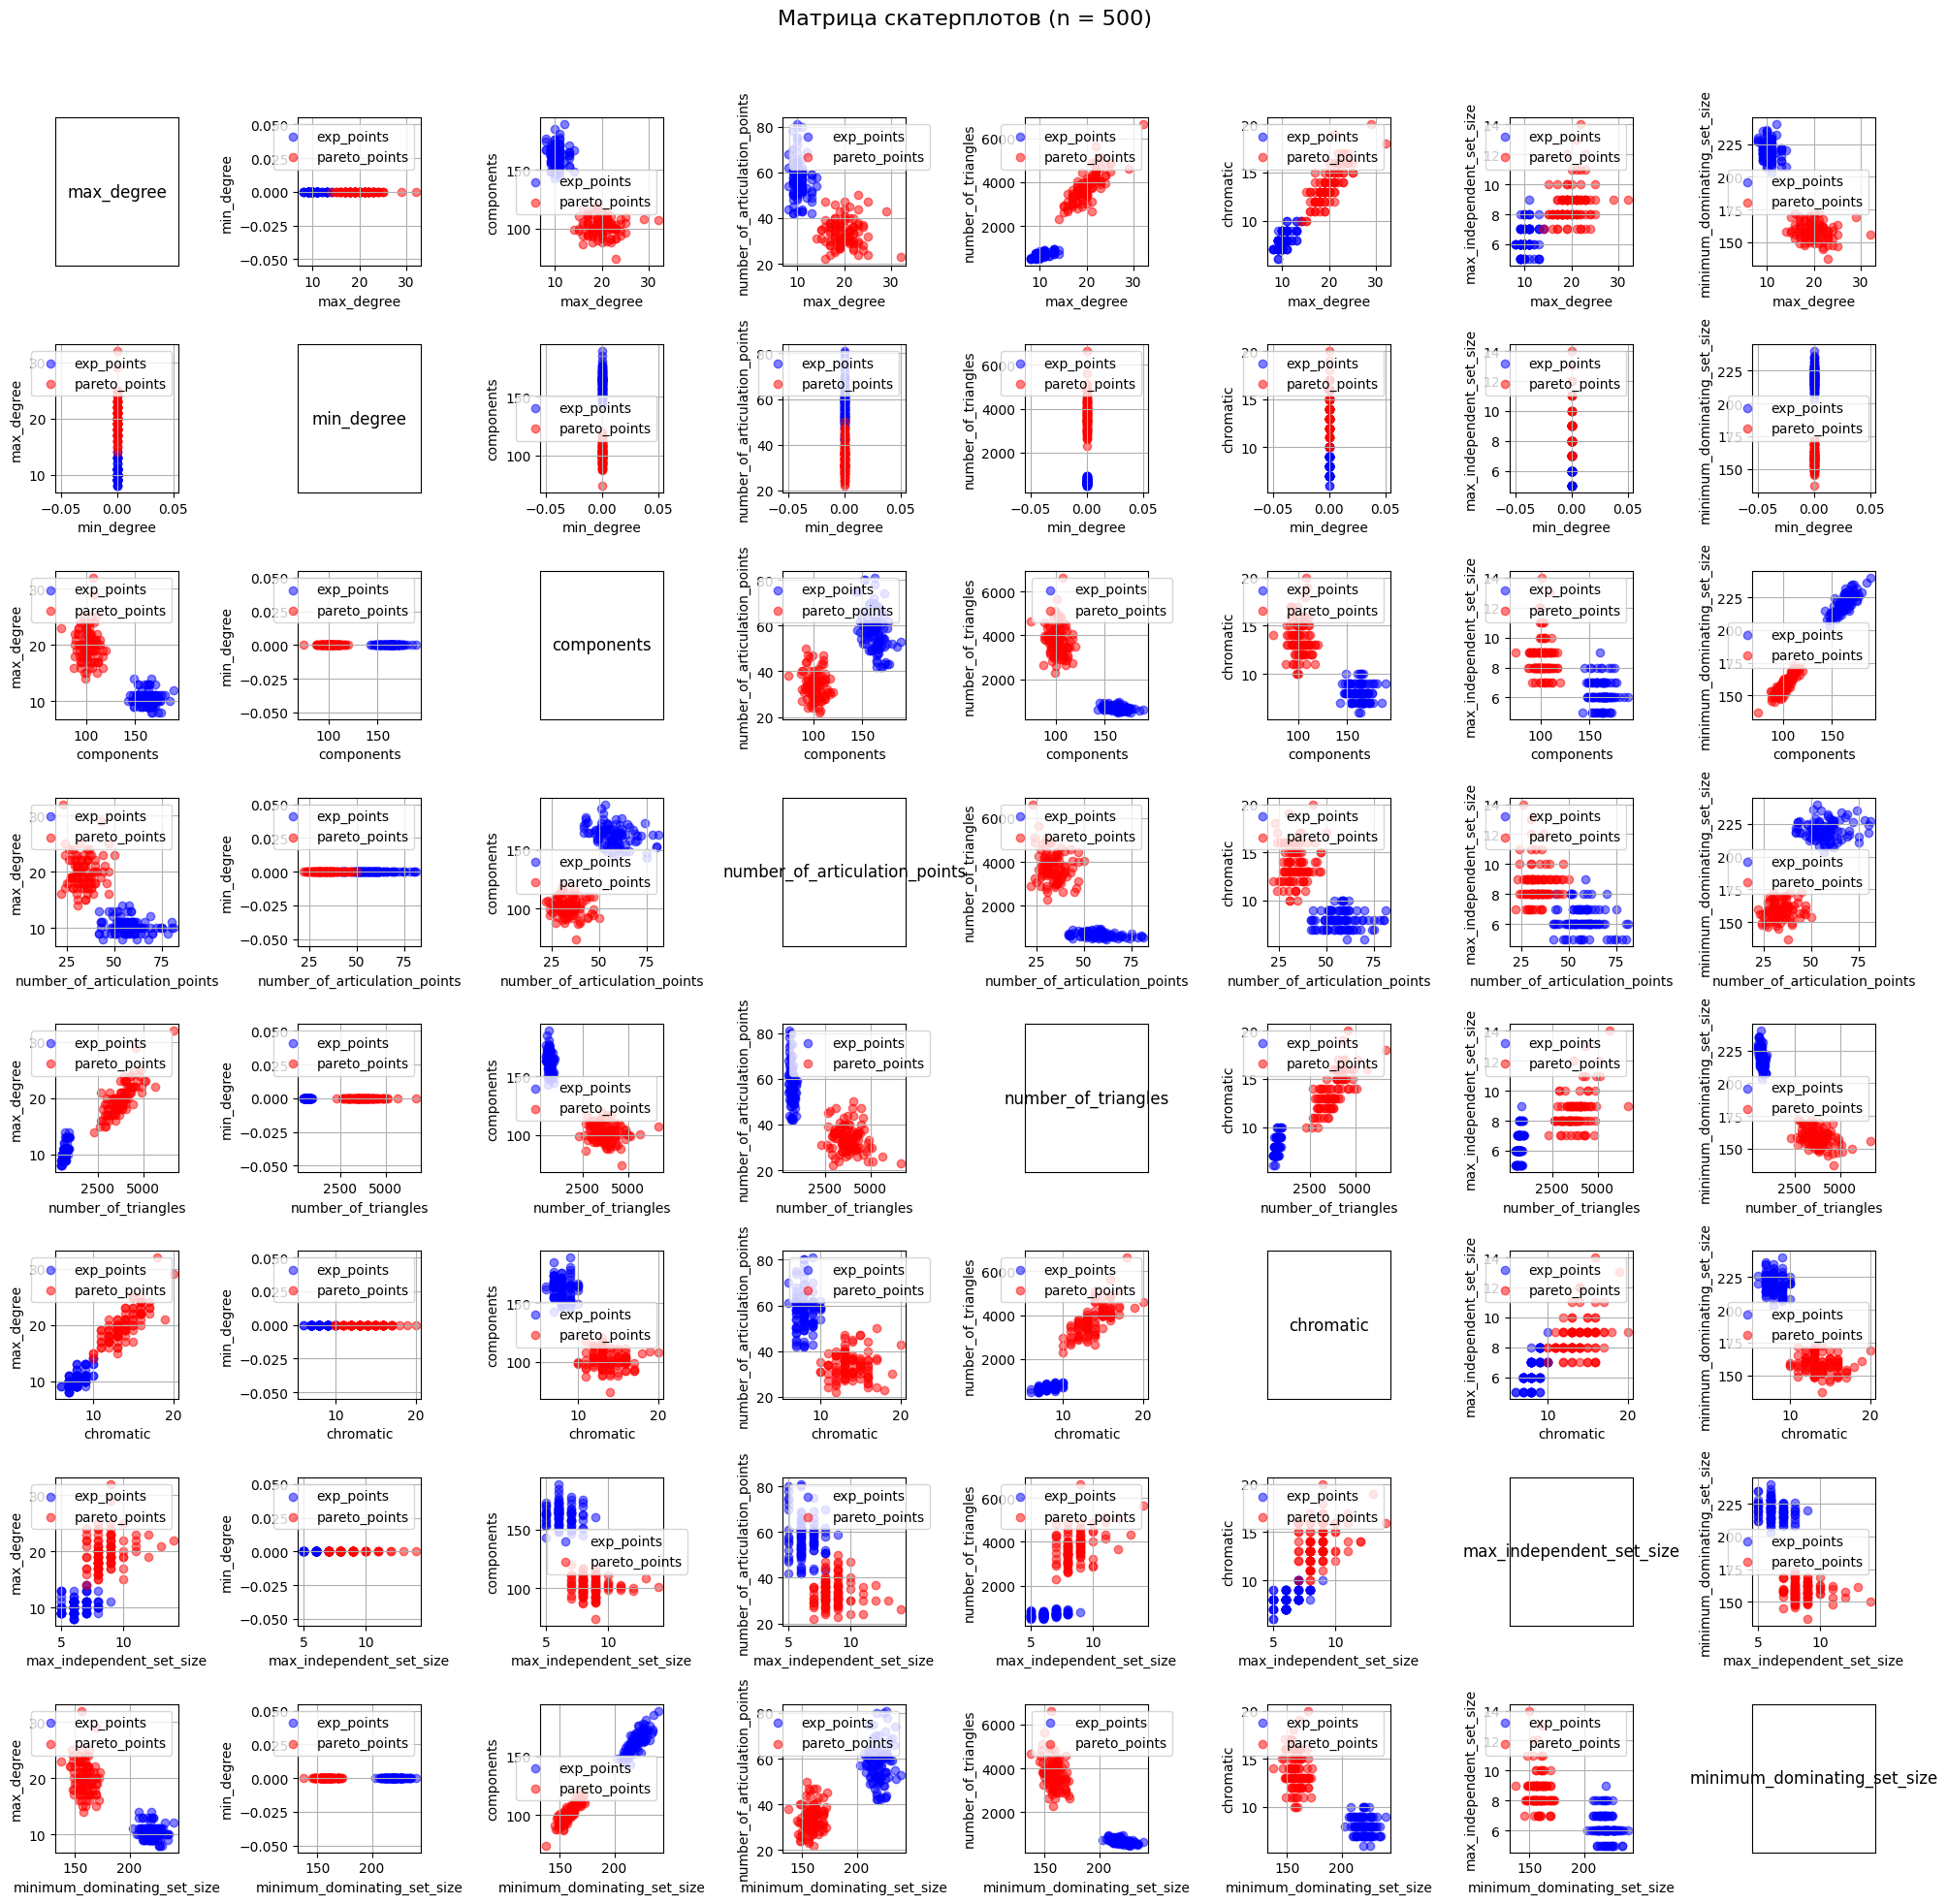

ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(———— ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————


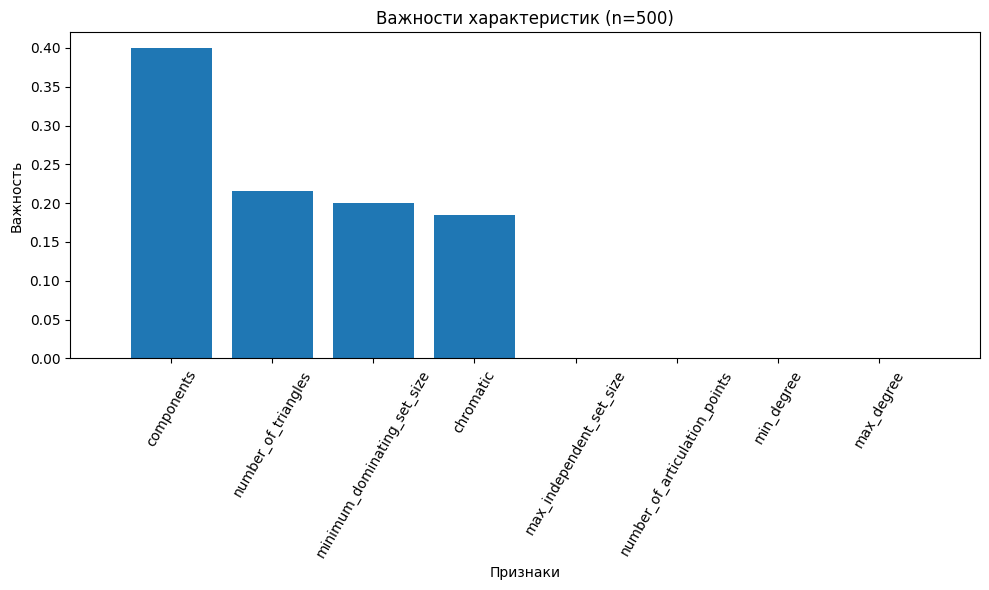

In [12]:
describe_features_importances(500)